In [8]:
import os
import os.path as osp
import cv2
import numpy as np
import torch
from torchvision import transforms
import albumentations as albu
import matplotlib.pyplot as plt

from src.features.segmentation.dataset import SegmentationDataset

In [2]:
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]

In [3]:
path = r"/Users/obobojk/Documents/GitHub/CTCI/data/split/valid"

In [4]:
def unnormalize(tensor, mean, std):
    for t, m, s in zip(tensor, mean, std):
            t.mul_(s).add_(m)
    return tensor

In [5]:
def show_tensor_image(image):
    reverse_transforms = transforms.Compose([
   #     transforms.Lambda(lambda t: unnormalize(t, IMAGENET_MEAN, IMAGENET_STD)),
        transforms.Lambda(lambda t: t.permute(1, 2, 0)), # CHW to HWC
        transforms.Lambda(lambda t: t * 255.),
        transforms.Lambda(lambda t: t.numpy().astype(np.uint8)),
        transforms.ToPILImage(),
    ])

    # Take first image of batch
    if len(image.shape) == 4:
        image = image[0, :, :, :] 
    plt.imshow(reverse_transforms(image))

In [6]:
tr = albu.Compose([
    albu.Resize(256, 256),
    albu.CLAHE(always_apply=True)
])

In [7]:
data = SegmentationDataset(
    images_dir=osp.join(path, "images"),
    masks_dir=osp.join(path, "masks"),
    augmentation_transform=tr
)
dataloader = torch.utils.data.DataLoader(data, batch_size=1, shuffle=True)

AssertionError: some images or masks are missing

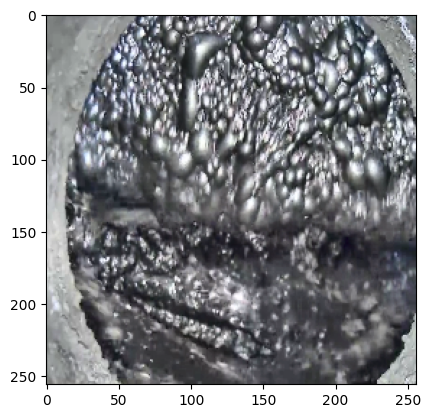

In [30]:
im = next(iter(dataloader))[0]
show_tensor_image(im)